In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import analysis_parameters as ap
import numpy as np
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [3]:
model="SCREAM"
var_name="rlt"

# Global tropical cloud ice


In [4]:
chunk_dict = {"time":3840//6, "lat":1137//3, "lon":1024}
var = xr.open_dataset("/scratch/b/b380883/dyamond2/"+model+"/"+var_name+"_ITCZ_NICAM-3km_20200120-20200228.nc", chunks=chunk_dict)[var_name]
# GEOS-6km_GT_20200120-20200229.nc
var

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/b/b380883/dyamond2/SCREAM/rlt_ITCZ_NICAM-3km_20200120-20200228.nc'

In [4]:
bins = np.linspace(80,310,40) # np.linspace(-5,1300,40) # np.logspace(-7,1,40) # np.arange(80,310,5)


In [ ]:
# hist, edges = dask.array.histogram(var, bins=bins, range=[0,1300]) # range=[1e-7, 10], [70,320], [0,1300]
mean = dask.array.mean(var, axis=0)
# counts = hist.compute()
mean = mean.compute()


[##                                      ] | 6% Completed |  6min 10.9s

In [ ]:
mean

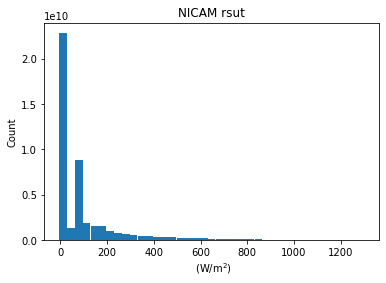

In [18]:
## Histogram ##
# x = (edges[1:]+edges[:-1])/2 # np.linspace(-7,1)
# plt.bar(x, counts, width=(bins[-1]-bins[0])/40) # np.array(np.logspace(-7,1,40))[:-1]
# # plt.xscale("log")
# # plt.xlim([80,310])
# if var_name[0]=="r":
#     plt.xlabel(" (W/m$^2$)")
# elif var_name[:3]=="cli":
#     plt.xlabel("IWP (kg/m$^2$)")
# plt.ylabel("Count")
# plt.title(model+" "+var_name)
# plt.savefig("../plots/"+model+"_"+var_name+"_ITCZ.png")
# plt.show()

## Mean Global ##
